# HM1: Logistic Regression.

### Name: [Shadi Ebadi]


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also you should plot their objective values versus epochs and compare their training and testing accuracies. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [3]:
# Load Packages
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
np.random.seed(42)  


C:\Users\sheba\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\sheba\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [31]:
data = pd.read_csv(r"C:\Users\sheba\Desktop\stevens_semester2\deep learning/data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## 1.2 Examine and clean data

In [1]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.


In [32]:
#Missing values
print(data.isnull().sum()) 
print(data.dtypes)
data = data.drop('id', axis=1)


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [33]:
data = data.drop('Unnamed: 32', axis=1)


In [18]:
print(data.dtypes)


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [34]:
data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': -1})
data

C:\Users\sheba\AppData\Local\Temp/ipykernel_18844/3977305466.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': -1})


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 1.3. Partition to training and testing sets

In [35]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machinel learning.
from sklearn.model_selection import train_test_split 


x_train, x_test, y_train, y_test = train_test_split(data.drop(['diagnosis'], axis = 1),
                                                    data['diagnosis'],
                                                    test_size = 0.2,
                                                    random_state = 99)


## 1.4. Feature scaling

Use the standardization to trainsform both training and test features

In [36]:
# Standardization
import numpy as np

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = np.mean(x_train, axis=0).to_numpy().reshape(1, d)
sig = np.std(x_train, axis=0).to_numpy().reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1e-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1e-6)

print('test mean = ')
print(np.mean(x_test, axis=0))

print('test std = ')
print(np.std(x_test, axis=0))

test mean = 
radius_mean               -0.129482
texture_mean              -0.035220
perimeter_mean            -0.125513
area_mean                 -0.110192
smoothness_mean           -0.038945
compactness_mean          -0.073125
concavity_mean            -0.040630
concave points_mean       -0.066406
symmetry_mean             -0.059605
fractal_dimension_mean     0.036604
radius_se                 -0.033157
texture_se                 0.050095
perimeter_se              -0.043073
area_se                   -0.064465
smoothness_se              0.000264
compactness_se             0.019330
concavity_se               0.065696
concave points_se          0.065752
symmetry_se               -0.088019
fractal_dimension_se       0.080401
radius_worst              -0.110786
texture_worst             -0.006319
perimeter_worst           -0.111726
area_worst                -0.096243
smoothness_worst          -0.058650
compactness_worst         -0.096465
concavity_worst           -0.062763
concave points_

In [37]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy().reshape(-1, 1)
x_test = x_test.to_numpy()
y_test = y_test.to_numpy().reshape(-1, 1)

# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistric regression and when $\lambda > 0$, it essentially becomes a regularized logistric regression.

In [38]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 vector
#     x: data: n-by-d matrix
#     y: label: n-by-1 vector
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):
    a=x @ w
    
    log_loss=np.mean(np.log(1+np.exp(-y*a)))
    
    if lam > 0:
        
        loss_reg = (lam / 2) * np.sum(w**2)  # L2 regularization
        loss = log_loss + loss_reg  # Total loss with regularization
    else:
        loss = log_loss  # No regularization when λ = 0
   
    
    return loss


# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [39]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix


def gradient(w, x, y, lam):
    n = x.shape[0]
    a=x @ w
    
    b=1+np.exp(y*a)
    coef=-y/b
    
    if lam > 0:
        gradient = (1 / n) * x.T @ coef + lam * w  # Regularized gradient
    else:
        gradient = (1 / n) * x.T @ coef  # Non-regularized gradient
        
        
    
    return gradient 

In [40]:
# Gradient descent for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 vector, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 vector, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    
    obj_value=[]
    
    for i in range(max_epoch):
    
        grad=gradient(w, x, y, lam)

        w=w-(learning_rate*grad)
    
        objective_value=objective(w, x, y, lam)
        obj_value.append(objective_value)

    
    return w,np.array(obj_value)

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [129]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.


In [41]:

# Setting the regularization parameter (lam)
lam = 0

#Initializing the weights (w)
d = x_train.shape[1]
w = np.zeros((d, 1))
learning_rate=0.1
max_epoch=100

w_optimized, obj_values = gradient_descent(x_train, y_train, lam, learning_rate, w, max_epoch)

print("Optimized weights (w):")
print(w_optimized)

print("\nObjective values during training:")
print(obj_values)

Optimized weights (w):
[[ 0.39089585]
 [ 0.34445796]
 [ 0.38868331]
 [ 0.39565873]
 [ 0.14779099]
 [ 0.14534079]
 [ 0.3071577 ]
 [ 0.40308206]
 [ 0.10577875]
 [-0.14747846]
 [ 0.35668305]
 [ 0.02099074]
 [ 0.31535348]
 [ 0.31876279]
 [ 0.03448131]
 [-0.08212439]
 [-0.07662004]
 [ 0.09767343]
 [-0.04704764]
 [-0.16645448]
 [ 0.45049593]
 [ 0.39391959]
 [ 0.44062472]
 [ 0.43594007]
 [ 0.31893295]
 [ 0.23327074]
 [ 0.281366  ]
 [ 0.41084566]
 [ 0.27574743]
 [ 0.14113369]]

Objective values during training:
[0.52148675 0.43398544 0.38046731 0.34372916 0.3166104  0.29557174
 0.27864909 0.26465872 0.25284159 0.24268671 0.2338364  0.22603206
 0.21908164 0.21283914 0.20719141 0.20204917 0.19734094 0.19300872
 0.18900486 0.18528981 0.18183042 0.17859869 0.17557072 0.17272603
 0.17004692 0.16751801 0.16512584 0.1628586  0.16070587 0.15865841
 0.15670798 0.15484723 0.15306956 0.15136904 0.14974032 0.14817853
 0.14667928 0.14523855 0.14385268 0.14251833 0.14123242 0.13999213
 0.13879487 0.13763824

In [54]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

# Setting the regularization parameter (lam)
lam_1 = 0.01

#Initializing the weights (w)
d = x_train.shape[1]
w = np.zeros((d, 1))
learning_rate=0.1
max_epoch=100
w_optimized_1, obj_values = gradient_descent(x_train, y_train, lam, learning_rate, w, max_epoch)



## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [43]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    a=xi @ w
    log_loss=np.log(1+np.exp(-yi*a))

    
    
    
    c=xi @ w
    
    b=1+np.exp(yi*c)
    coef=-yi/b
    gradient =xi.T @ coef 
    
    if lam > 0:
        
    # Applying regularization if lambda > 0
        gradient += lam * w
    
    
 

    
    return log_loss,gradient

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [44]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=100):
    n=len(x)
   
    objvals = []
       
    for epoch in range(max_epoch):
        shuffle_order = np.random.permutation(n)
        x_shuffled = x[shuffle_order]
        y_shuffled = y[shuffle_order]
        
        loss=0
        
        for i in range(n):
            xi=x_shuffled[i,:].reshape(1, -1)
            yi=y_shuffled[i].reshape(1,1) 
            
        
            loss_i, gradient = stochastic_objective_gradient(w, xi, yi, lam)
            w=w-(gradient*learning_rate)
        
        
            loss=loss+loss_i
        
        
        loss_avg=(loss)/n
        
        
        if lam > 0:
                
            loss_reg = (lam / 2) * np.sum(w**2)  # L2 regularization term
        else:
            loss_reg = 0
        
        # Total loss including regularization
        final_loss = loss_avg + loss_reg
        
        objvals.append(final_loss)
        
        
    return w,np.array(objvals)
    
    
    
    

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [45]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

# Setting the regularization parameter (lam)
lam = 0

#Initializing the weights (w)
d = x_train.shape[1]
w = np.zeros((d, 1))
learning_rate=0.1
max_epoch=100

w_optimized, obj_values = sgd(x_train, y_train, lam, learning_rate, w, max_epoch)
w_optimized

array([[ 0.66118062],
       [ 0.99752915],
       [ 0.96674438],
       [-0.17626648],
       [ 0.72015059],
       [-2.95134333],
       [ 2.82902406],
       [ 3.47321194],
       [-1.45603947],
       [-0.18511232],
       [ 4.91914701],
       [-1.08323588],
       [ 1.01835941],
       [ 2.60274967],
       [ 0.19773526],
       [-2.03968692],
       [-0.76225641],
       [ 3.50327762],
       [-1.49048237],
       [-2.91969834],
       [ 1.81725123],
       [ 2.50895868],
       [ 1.50401904],
       [ 0.38304402],
       [ 0.62448892],
       [-1.30975299],
       [ 1.2997472 ],
       [ 1.21431199],
       [ 2.64274761],
       [ 3.65600146]])

In [29]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

lam = 0.01

#Initializing the weights (w)
d = x_train.shape[1]
w = np.zeros((d, 1))
learning_rate=0.1
max_epoch=100

w_optimized_2, obj_values_2 = sgd(x_train, y_train, lam, learning_rate, w, max_epoch)
print("Optimized weights (w):")
print(w_optimized_2)

print("\nObjective values during training:")
print(obj_values_2)


Optimized weights (w):
[[ 0.45552502]
 [ 0.45757597]
 [ 0.45075975]
 [ 0.52792513]
 [ 0.13705159]
 [-0.15485504]
 [ 0.48678186]
 [ 0.62960307]
 [-0.07567251]
 [-0.23164586]
 [ 0.75714869]
 [-0.10988772]
 [ 0.56499576]
 [ 0.63148495]
 [ 0.25172423]
 [-0.52109774]
 [-0.30900769]
 [ 0.12271216]
 [-0.19983637]
 [-0.351838  ]
 [ 0.63885566]
 [ 0.6144375 ]
 [ 0.60750167]
 [ 0.68017148]
 [ 0.56695742]
 [ 0.13888984]
 [ 0.38435729]
 [ 0.59806542]
 [ 0.49759476]
 [ 0.35320082]]

Objective values during training:
[[[0.13855421]]

 [[0.12199766]]

 [[0.1102463 ]]

 [[0.11607986]]

 [[0.10992561]]

 [[0.11349178]]

 [[0.11136611]]

 [[0.11098986]]

 [[0.10826036]]

 [[0.11279892]]

 [[0.10806759]]

 [[0.11078597]]

 [[0.1134826 ]]

 [[0.11255417]]

 [[0.11326561]]

 [[0.11686248]]

 [[0.10966611]]

 [[0.11349181]]

 [[0.11230636]]

 [[0.10768245]]

 [[0.11365613]]

 [[0.11274629]]

 [[0.10854084]]

 [[0.10912796]]

 [[0.10627823]]

 [[0.11752474]]

 [[0.11077467]]

 [[0.11189242]]

 [[0.11422204]]

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [46]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    
    a=xi @ w
    log_loss=np.mean(np.log(1+np.exp(-yi*a)))
  
    
    
    c=xi @ w
    
    b=1+np.exp(yi*c)
    coef=-yi/b
    gradient =xi.T @ coef/xi.shape[0]
    if lam > 0:
        
    # Applying regularization if lambda > 0
        gradient += lam * w
    

    
    return log_loss,gradient

    

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [47]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100, batch_size=32):
    
    n=len(x)
   
    objvals = []
       
    for epoch in range(max_epoch):
        shuffle_order = np.random.permutation(n)
        x_shuffled = x[shuffle_order]
        y_shuffled = y[shuffle_order].reshape(-1, 1)
        num_batches = max(1, n // batch_size)  

        
        loss=0
        
        for i in range(0,n,batch_size):
            xi=x_shuffled[i:i+batch_size,:]
            yi=y_shuffled[i:i+batch_size]
            
        
            loss_i, gradient = mb_objective_gradient(w, xi, yi, lam)
            w=w-(gradient*learning_rate)
        
        
            loss=loss+loss_i
        
        
        loss_avg=(loss)/num_batches
        
        
        if lam > 0:
            #  regularization term if lambda > 0
            loss_reg = (lam / 2) * np.sum(w**2)
        else:
            loss_reg = 0  # No regularization if lambda = 0
        

        final_loss=loss_avg+loss_reg
        
        objvals.append(final_loss)
        
        
    return w,np.array(objvals)
    
    

In [ ]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.


In [48]:
lam = 0

#Initializing the weights (w)
d = x_train.shape[1]
w = np.zeros((d, 1))
learning_rate=0.1
max_epoch=100

w_optimized, obj_values = mbgd(x_train, y_train, lam, learning_rate, w, max_epoch)
w_optimized

array([[ 0.53163455],
       [ 0.74250211],
       [ 0.52578289],
       [ 0.66253629],
       [ 0.21926582],
       [-0.27376666],
       [ 0.72699605],
       [ 0.88207792],
       [-0.08232525],
       [-0.24806748],
       [ 1.15303637],
       [-0.05697736],
       [ 0.85624593],
       [ 0.92083973],
       [ 0.27623445],
       [-0.80850835],
       [-0.16506893],
       [ 0.27154234],
       [-0.16317231],
       [-0.56310942],
       [ 0.8591483 ],
       [ 0.92108266],
       [ 0.80206176],
       [ 0.94374012],
       [ 0.90890178],
       [ 0.13715654],
       [ 0.6675489 ],
       [ 0.88649898],
       [ 0.72298931],
       [ 0.52598455]])

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [49]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.01

#Initializing the weights (w)
d = x_train.shape[1]
w = np.zeros((d, 1))
learning_rate=0.1
max_epoch=100

w_optimized_3, obj_values_3 = mbgd(x_train, y_train, lam, learning_rate, w, max_epoch)
w_optimized

array([[ 0.53163455],
       [ 0.74250211],
       [ 0.52578289],
       [ 0.66253629],
       [ 0.21926582],
       [-0.27376666],
       [ 0.72699605],
       [ 0.88207792],
       [-0.08232525],
       [-0.24806748],
       [ 1.15303637],
       [-0.05697736],
       [ 0.85624593],
       [ 0.92083973],
       [ 0.27623445],
       [-0.80850835],
       [-0.16506893],
       [ 0.27154234],
       [-0.16317231],
       [-0.56310942],
       [ 0.8591483 ],
       [ 0.92108266],
       [ 0.80206176],
       [ 0.94374012],
       [ 0.90890178],
       [ 0.13715654],
       [ 0.6675489 ],
       [ 0.88649898],
       [ 0.72298931],
       [ 0.52598455]])

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

In [50]:
w_optimized, obj_values_gd = gradient_descent(x_train, y_train, lam, learning_rate, w, max_epoch)
w_optimized, obj_values_sgd = sgd(x_train, y_train, lam, learning_rate, w, max_epoch)
w_optimized, obj_values_mbgd = mbgd(x_train, y_train, lam, learning_rate, w, max_epoch)


In [51]:
obj_values_gd = obj_values_gd.flatten()
obj_values_sgd = obj_values_sgd.flatten()
obj_values_mbgd = obj_values_mbgd.flatten()

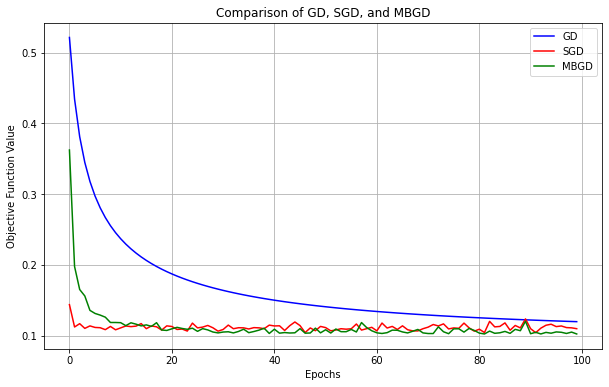

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(range(max_epoch), obj_values_gd, label="GD", color="blue")
plt.plot(range(max_epoch), obj_values_sgd, label="SGD", color="red")
plt.plot(range(max_epoch), obj_values_mbgd, label="MBGD", color="green")

plt.xlabel("Epochs")
plt.ylabel("Objective Function Value")
plt.title("Comparison of GD, SGD, and MBGD")
plt.legend()
plt.grid(True)
plt.show()


# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [44]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
   
    

In [53]:
def predict_1(w, X):
    a = X @ w
    
    # Apply the sigmoid function to get probabilities
    probabilities = 1 / (1 + np.exp(-a))
    
    # Predict class labels (1 if probability > 0.5, else -1)
    predictions = np.where(probabilities >= 0.5, 1, -1)  # This maps the output to 1 and -1
    
    return predictions


In [55]:
# evaluate training error of logistric regression and regularized version
y_train_pred = predict_1(w_optimized_1, x_train)

train_accuracy = np.mean(y_train_pred == y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")


Training Accuracy: 97.58%


In [56]:
# evaluate testing error of logistric regression and regularized version
y_test_pred = predict_1(w_optimized, x_test)
test_accuracy = np.mean(y_test_pred == y_test)

print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Testing Accuracy: 98.25%


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

In [57]:
for lam in [0, 0.01]:
    for lr in [0.01, 0.1]:
        w0 = np.zeros((x_train.shape[1], 1))
        w_gd, _ = gradient_descent(x_train, y_train, lam, lr, w0.copy(), 100)
        w_sgd, _ = sgd(x_train, y_train, lam, lr, w0.copy(), 100)
        w_mbgd, _ = mbgd(x_train, y_train, lam, lr, w0.copy(), 100, batch_size=32)
        print(f"λ={lam}, lr={lr} | GD: {np.mean(predict_1(w_gd, x_test)==y_test)*100:.2f}% | "
              f"SGD: {np.mean(predict_1(w_sgd, x_test)==y_test)*100:.2f}% | "
              f"MBGD: {np.mean(predict_1(w_mbgd, x_test)==y_test)*100:.2f}%")


λ=0, lr=0.01 | GD: 92.98% | SGD: 97.37% | MBGD: 98.25%
λ=0, lr=0.1 | GD: 98.25% | SGD: 96.49% | MBGD: 98.25%
λ=0.01, lr=0.01 | GD: 92.98% | SGD: 98.25% | MBGD: 98.25%
λ=0.01, lr=0.1 | GD: 98.25% | SGD: 98.25% | MBGD: 98.25%
